#### Linear Regression

In [27]:
def hypothesis(theta, x):
    h = theta[0] * x[0] + (theta[1] * x[1])
    return h

def cost_function(theta, X, y, m):
    sse = 0
    for i in range(m):
        x = X[i]
        h_i = hypothesis(theta,x)
        y_i = y[i]
        err = (h_i - y_i)
        sqErr = err**2
        sse += sqErr
    const = 1 / (2*m)
    cost = const * sse
    return cost

def cfd(theta, X, y, sub_i, m):
    sumErr = 0
    for i in range(m):
        x = X[i]
        h_i = hypothesis(theta, x)
        y_i = y[i]
        err = (h_i - y_i) * x[sub_i]
        sumErr += err
    cost = (1 / m) * sumErr
    return cost

def gradient_descent(X, y, theta, m, alpha):
    opt_theta = []
    constant = alpha * (1 / m)
    for i in range(len(theta)):
        cost = cfd(theta, X, y, i, m)
        updated_theta = theta[i] - constant * cost
        opt_theta.append(updated_theta)
    return opt_theta

def Linear_Regression(X, y, alpha, theta, iter):
    m = len(X)
    for i in range(iter):
        opt_theta = gradient_descent(X, y, theta, m, alpha)
        theta = opt_theta
    return opt_theta

#### Demo

##### Set up Data

In [109]:
x_test = [[1,3],[1,9],[1,2],[1,4],[1,8],[1,2],[1,12],[1,20]]
y_test = [12,14,10,23,20,7,13,24]
theta = [4,2]
alpha = 0.001
iterations = 20000

##### Run Model

In [110]:
optimal_theta = Linear_Regression(x_test, y_test, alpha, theta, iterations)

In [115]:
print("Y-Intercept: " + str(optimal_theta[0]))
print("Slope: " + str(optimal_theta[1]))

Y-Intercept: 8.178484025061941
Slope: 0.8226816794040042


##### Visualization

In [112]:
import matplotlib.pyplot as plt
import numpy as np

In [113]:
x_input = [3,9,2,4,8,2,12,20]
y_input = [12,14,10,23,20,7,13,24]

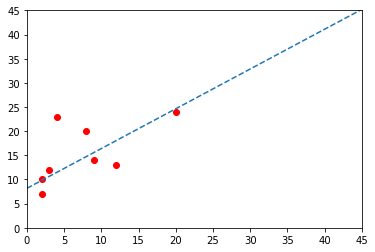

In [114]:
plt.plot(x_input, y_input, 'ro')
plt.axis([0, 45, 0, 45])
abline(optimal_theta[1],optimal_theta[0])
plt.show()

##### Helpers

In [61]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')